#Punto 2.3
##Julian Andres Salazar Parias

In [ ]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1.0  # Amplitud de la primera componente de la señal se plantea que es igual a 1
B = 0.5  # Amplitud de la segunda componente de la señal se plantea que es igual a 0.5
F1 = 1.0  # Frecuencia de la primera componente de la señal se plantea que es igual a 1
F2 = 2.0  # Frecuencia de la segunda componente de la señal se plantea que es igual a 2
SNR_db = 2  # Relación señal-ruido en dB

# Generar datos de entrenamiento
np.random.seed(0)  # Fijar la semilla para reproducibilidad
num_train = 100  # Número de puntos de entrenamiento
num_predict = 20  # Número de puntos de predicción
x_train = np.linspace(0, 1, num_train)  # Generar valores de x entre 0 y 1
x_predict = np.linspace(0, 1, num_predict)  # Generar valores de x entre 0 y 1

Señal verdadera: $A\cdot sin(2πF_1x)+B \cdot cos(2πF_2x)$

In [ ]:
y_true = A * np.sin(2 * np.pi * F1 * x_train) + B * np.cos(2 * np.pi * F2 * x_train)  # Señal verdadera


$σ= \frac{std(\text{señal verdadera})}{10^{\frac{SNR_{db}}{20}}}$


In [ ]:
noise_std = np.std(y_true) / (10 ** (SNR_db / 20))  # Calcular el desvío estándar del ruido

Señal de entrenamiento: señal verdadera + $  𝓝 (0,σ^2)$

In [ ]:
y_train = y_true + np.random.normal(0, noise_std, num_train)  # Agregar ruido a los datos de entrenamiento

Señal a predecir: $A \cdot sin(2 π F_1 x_{predicción})+B \cdot cos(2 π F_2 x_{predicción})$

In [ ]:
y_predict = A * np.sin(2 * np.pi * F1 * x_predict) + B * np.cos(2 * np.pi * F2 * x_predict)  # Señal para predicción

In [ ]:
# Características de tipo RBF (Funciones de Base Radial)
Q = 20  # Número de componentes a generar

Características de tipo RBF: $Φ(x)=\exp(-γ{||x-𝜇_k||}^2)$ para $k=1,2,\ldots,Q$ donde $γ$ es el parámetro de escala de la RBF $𝜇_k$ son los centros de las RBF generadas

In [ ]:
rbf_feature = RBFSampler(gamma=1.0, n_components=Q, random_state=0)  # Inicializar generador RBF

In [ ]:
X_train_rbf = rbf_feature.fit_transform(x_train.reshape(-1, 1))  # Obtener características RBF de datos de entrenamiento
X_predict_rbf = rbf_feature.transform(x_predict.reshape(-1, 1))  # Obtener características RBF de datos de predicción

# Ajustar el modelo de regresión lineal bayesiano
bayesian_regressor = BayesianRidge()  # Inicializar el modelo de regresión bayesiano
bayesian_regressor.fit(X_train_rbf, y_train)  # Ajustar el modelo con las características RBF y datos de entrenamiento

BayesianRidge()

Predicción bayesiana = $Φ(x_{\text{predict}})\cdot w$

In [ ]:
# Predecir con el modelo ajustado
y_predicted_bayesian = bayesian_regressor.predict(X_predict_rbf)  # Realizar predicciones con el modelo ajustado

In [ ]:
# Imprimir resultados
print("Predicción del modelo bayesiano:")
print(y_predicted_bayesian)

Predicción del modelo bayesiano:
[ 1.30756231  1.04754192  0.91843411  0.8628491   0.83208905  0.7873086
  0.70034915  0.55423174  0.34330313  0.07303913 -0.24048128 -0.57140885
 -0.88523362 -1.14013372 -1.28852018 -1.27872971 -1.0568143  -0.56837482
  0.23961465  1.41704352]


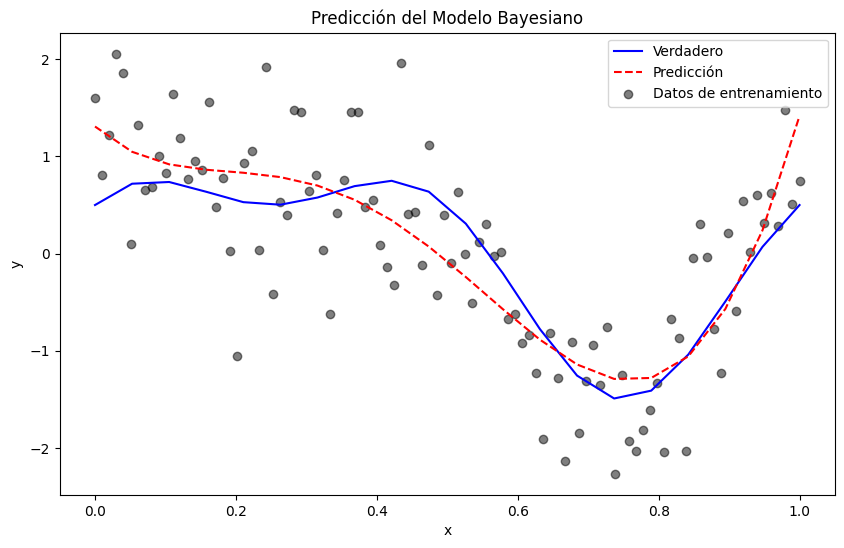

In [ ]:
# Plottear los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar la señal verdadera (valores reales)
plt.plot(x_predict, y_predict, label="Verdadero", color="blue")

# Graficar la predicción del modelo bayesiano
plt.plot(x_predict, y_predicted_bayesian, label="Predicción", color="red", linestyle="--")

# Graficar los datos de entrenamiento
plt.scatter(x_train, y_train, color="black", alpha=0.5, label="Datos de entrenamiento")

# Agregar leyenda al gráfico
plt.legend()

# Agregar título y etiquetas a los ejes
plt.title("Predicción del Modelo Bayesiano")
plt.xlabel("x")
plt.ylabel("y")

# Mostrar el gráfico
plt.show()

In [ ]:
# Ajuste del modelo de regresión por máxima verosimilitud

# Asignamos las características RBF a la matriz de entrenamiento
X_train = X_train_rbf #Asumimos que la matriz de entrenamiento es la misma que la matriz de características RBF de datos de entrenamiento

Agregamos un término de sesgo (bias) a la matriz de entrenamiento: $X_{\text{train}}=[\begin{matrix} 1&X_{\text{train-rbf}}\\\end{matrix}]$

In [ ]:
# Agregamos un término de sesgo (bias) a la matriz de entrenamiento
X_train = np.hstack([np.ones((num_train, 1)), X_train])

Coeficiente estimados por máxima verosimilitud: $w_{ml}={(X_{\text{train}}^T X_{\text{train}})}^{-1} X_{\text{train}}^T y_{\text{train}}$

In [ ]:
# Ajuste del modelo de regresión por máxima verosimilitud
w_ml = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [ ]:
# Predecir con el modelo de máxima verosimilitud

# Asignamos las características RBF a la matriz de predicción
X_predict = X_predict_rbf

Agregamos un término de sesgo (bias) a la matriz de predicción: $X_{\text{train}}=[\begin{matrix} 1&X_{\text{train-rbf}}\\\end{matrix}]$

In [ ]:
# Agregamos un término de sesgo (bias) a la matriz de predicción
X_predict = np.hstack([np.ones((num_predict, 1)), X_predict])

Predicciones con el modelo de máxima verosimilitud: $\hat{y}_{ml}=X_{\text{predict}}w_{ml}$

In [ ]:
# Realizar predicciones con el modelo de máxima verosimilitud
y_predicted_ml = X_predict @ w_ml

In [ ]:
# Imprimir resultados
print("Predicción del modelo de máxima verosimilitud:")
print(y_predicted_ml)

Predicción del modelo de máxima verosimilitud:
[ 0.57603658  0.43402661  0.28038064  0.13607887  0.06467639  0.09266764
  0.18900585  0.28010005  0.28104788  0.12857892 -0.19414345 -0.64638815
 -1.13420722 -1.52921885 -1.69890956 -1.5447979  -1.04521338 -0.30098405
  0.41510266  0.60075601]


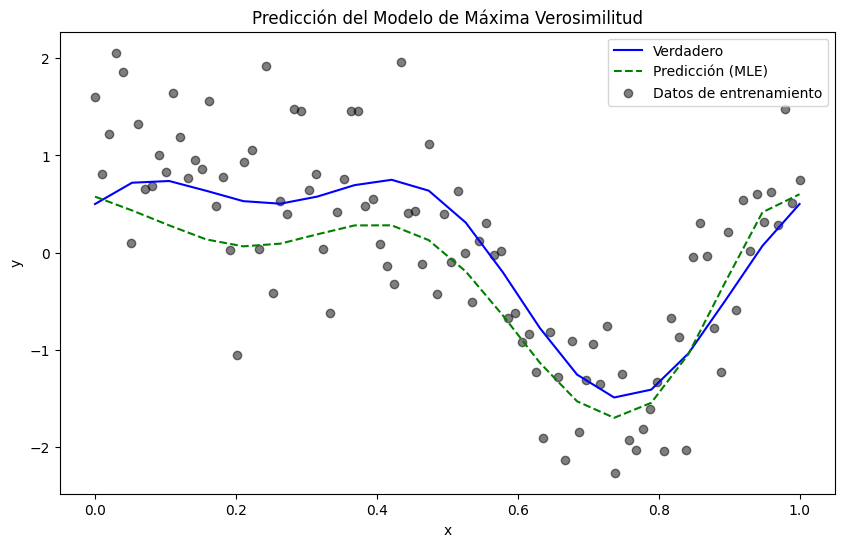

In [ ]:
# Plottear los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar la señal verdadera (valores reales)
plt.plot(x_predict, y_predict, label="Verdadero", color="blue")

# Graficar la predicción del modelo de máxima verosimilitud
plt.plot(x_predict, y_predicted_ml, label="Predicción (MLE)", color="green", linestyle="--")

# Graficar los datos de entrenamiento
plt.scatter(x_train, y_train, color="black", alpha=0.5, label="Datos de entrenamiento")

# Agregar leyenda al gráfico
plt.legend()

# Agregar título y etiquetas a los ejes
plt.title("Predicción del Modelo de Máxima Verosimilitud")
plt.xlabel("x")
plt.ylabel("y")

# Mostrar el gráfico
plt.show()